In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NE_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,NaN,0.64,0.64,0.0,0.32,0.00,0.00,NaN,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,NaN,0.0,0.14,0.28,NaN,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,NaN,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,NaN,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,NaN
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,NaN,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,NaN
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,NaN,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,NaN,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	203
float64		column 2	203
float64		column 3	381
float64		column 4	232
float64		column 5	174
float64		column 6	203
float64		column 7	294
float64		column 8	294
float64		column 9	87
float64		column 10	174
float64		column 11	203
float64		column 12	203
float64		column 13	174
float64		column 14	174
float64		column 15	203
float64		column 16	203
float64		column 17	174
float64		column 18	116
float64		column 19	261
float64		column 20	145
float64		column 21	290
float64		column 22	265
float64		column 23	319
float64		column 24	294
float64		column 25	116
float64		column 26	116
float64		column 27	261
float64		column 28	178
float64		column 29	319
float64		column 30	265
float64		column 31	261
float64		column 32	323
float64		column 33	174
float64		column 34	294
float64		column 35	232
float64		column 36	265
float64		column 37	294
float64		column 38	174
float64		column 39	348
float64		column 40	203
float64		column 41	261
float64		column 42	323
float6

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4394.000000,4394.000000,4216.000000,4365.000000,4423.000000,4394.000000,4303.000000,4303.000000,4510.000000,4423.000000,...,4452.000000,4158.000000,4423.000000,4332.000000,4423.000000,4452.000000,4365.000000,4394.000000,4423.000000,4249.000000
mean,0.099581,0.202594,0.276679,0.050926,0.306301,0.094716,0.105891,0.101097,0.089118,0.230393,...,0.030281,0.035525,0.136090,0.015673,0.268818,0.075257,0.043791,4.984195,52.039566,270.580843
std,0.295298,1.255065,0.499722,1.181290,0.650037,0.273910,0.363245,0.398004,0.276963,0.579348,...,0.284187,0.228879,0.229299,0.108041,0.822675,0.247200,0.438572,28.519617,196.989594,572.028898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.596250,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.285000,15.000000,97.000000
75%,0.000000,0.000000,0.400000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.150000,...,0.000000,0.000000,0.186000,0.000000,0.316500,0.051000,0.000000,3.704750,43.000000,264.000000
max,4.540000,14.280000,5.100000,42.810000,9.090000,5.880000,7.270000,11.110000,5.260000,11.110000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

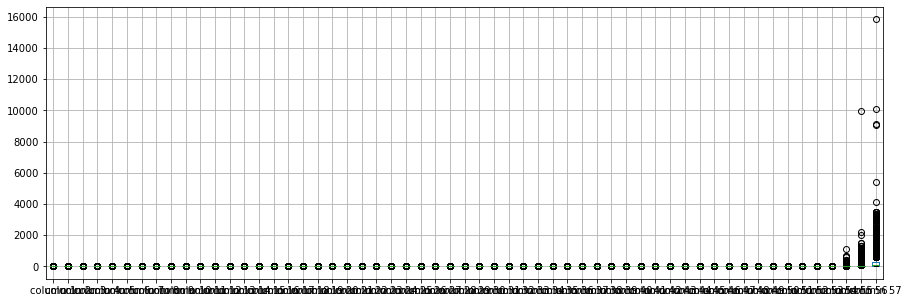

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.099581
column 2       0.202594
column 3       0.276679
column 4       0.050926
column 5       0.306301
column 6       0.094716
column 7       0.105891
column 8       0.101097
column 9       0.089118
column 10      0.230393
column 11      0.056518
column 12      0.533163
column 13      0.092837
column 14      0.053681
column 15      0.047383
column 16      0.240332
column 17      0.138888
column 18      0.180754
column 19      1.667258
column 20      0.082994
column 21      0.796573
column 22      0.112701
column 23      0.096590
column 24      0.088336
column 25      0.540560
column 26      0.262162
column 27      0.757053
column 28      0.122258
column 29      0.095393
column 30      0.100409
column 31      0.060699
column 32      0.042024
column 33      0.093262
column 34      0.043788
column 35      0.103535
column 36      0.093823
column 37      0.128887
column 38      0.013023
column 39      0.076670
column 40      0.063295
column 41      0.041783
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.013474,0.064002,0.015940,0.019098,0.060304,0.023182,-0.002893,0.113936,0.055284,...,-0.021832,-0.025041,-0.031609,-0.028929,0.057232,0.117485,-0.008306,0.042148,0.059074,0.090746
column 2,-0.013474,1.000000,-0.030075,-0.005741,-0.020486,-0.022978,0.001690,-0.013987,-0.002457,0.028751,...,-0.014951,-0.003391,-0.053073,-0.019870,-0.012410,-0.008578,0.003878,0.002764,0.001149,-0.019840
column 3,0.064002,-0.030075,1.000000,-0.017456,0.092070,0.080382,0.044597,0.003459,0.086935,0.047868,...,-0.023108,-0.027433,-0.006436,-0.040735,0.107498,0.085352,-0.001496,0.117449,0.100126,0.064595
column 4,0.015940,-0.005741,-0.017456,1.000000,-0.007225,-0.007199,0.022792,0.011477,0.001344,-0.004666,...,-0.000325,0.002675,-0.013895,-0.006199,-0.003243,0.010938,0.000852,0.005142,0.022157,0.028985
column 5,0.019098,-0.020486,0.092070,-0.007225,1.000000,0.058295,0.132276,0.028001,0.018568,0.047620,...,-0.030274,-0.028689,-0.047694,-0.034246,0.033616,0.037063,0.002533,0.051525,0.054373,0.007810
column 6,0.060304,-0.022978,0.080382,-0.007199,0.058295,1.000000,0.056869,0.082641,0.114968,0.021044,...,-0.028666,-0.024806,-0.002064,-0.022140,0.049338,0.108077,0.023010,-0.005483,0.081302,0.083268
column 7,0.023182,0.001690,0.044597,0.022792,0.132276,0.056869,1.000000,0.044310,0.062409,0.076787,...,-0.029933,-0.032770,-0.057030,-0.028954,0.080500,0.079074,0.048982,0.050023,0.055591,-0.005200
column 8,-0.002893,-0.013987,0.003459,0.011477,0.028001,0.082641,0.044310,1.000000,0.109032,0.093263,...,-0.018305,-0.024951,-0.036410,-0.018686,0.038467,0.055750,-0.006421,0.016258,0.037106,0.040563
column 9,0.113936,-0.002457,0.086935,0.001344,0.018568,0.114968,0.062409,0.109032,1.000000,0.148477,...,-0.023452,-0.009759,-0.030467,0.009494,0.045672,0.147304,-0.000452,0.117724,0.183238,0.247722
column 10,0.055284,0.028751,0.047868,-0.004666,0.047620,0.021044,0.076787,0.093263,0.148477,1.000000,...,-0.027853,0.015365,0.024415,0.004847,0.041021,0.089505,0.042081,0.087588,0.114380,0.110349


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+66,17+66+66,17+66+66+66,17+66+66,17+66,17], vae_layer = False, seed = 660)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 601.6180572509766
Epoch: 1 , loss: 598.0078147595768
Epoch: 2 , loss: 601.3469304739391
Epoch: 3 , loss: 599.8857330162766
Epoch: 4 , loss: 600.3200928159707
Epoch: 5 , loss: 600.0108620779855
Epoch: 6 , loss: 599.5416939233654
Epoch: 7 , loss: 599.5625299327465
Epoch: 8 , loss: 596.5647283680347
Epoch: 9 , loss: 588.9135568333004
Epoch: 10 , loss: 528.6303289061224
Epoch: 11 , loss: 466.19712616923795
Epoch: 12 , loss: 449.13921425317636
Epoch: 13 , loss: 427.17134958194106
Epoch: 14 , loss: 436.5720830511964
Epoch: 15 , loss: 415.3297566270994
Epoch: 16 , loss: 410.2277035596894
Epoch: 17 , loss: 400.33508252931387
Epoch: 18 , loss: 414.6008669756846
Epoch: 19 , loss: 403.82000724446897
Epoch: 20 , loss: 403.36460989443685
Epoch: 21 , loss: 398.30495697446815
Epoch: 22 , loss: 376.42451913016185
Epoch: 23 , loss: 393.6825413720533
Epoch: 24 , loss: 391.78766156239794
Epoch: 25 , loss: 413.98020554918

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.015242
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.161339
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42    -0.017337
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.074968,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.101386,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
1,0.000000,0.0,0.700299,0.0,0.0,0.0,0.454693,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,-0.024551,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
4,0.000000,0.0,0.286979,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-27.38353
4593,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.126257,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,12.74810
4594,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,-0.002803,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
4595,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.240193,0.0,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

17272.026150818012

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3639383928336317

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.034979
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35     -0.048205
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.074968,0.64,0.640000,0.0,0.32,0.00,0.000000,-0.101386,0.00,0.00,...,0.0,0.000000,0.000,0.0,0.778,0.000,0.000,3.756000,61.0,278.00000
1,0.210000,0.28,1.200299,0.0,0.14,0.28,0.664693,0.070000,0.00,0.94,...,0.0,0.000000,0.132,0.0,0.372,0.180,0.048,5.114000,101.0,1028.00000
2,0.000000,0.00,0.000000,0.0,0.63,0.00,0.310000,0.630000,0.31,0.63,...,0.0,-0.024551,0.135,0.0,0.135,0.000,0.000,3.537000,40.0,191.00000
3,0.000000,0.00,0.000000,0.0,1.85,0.00,0.000000,1.850000,0.00,0.00,...,0.0,0.000000,0.223,0.0,0.000,0.000,0.000,3.000000,15.0,54.00000
4,0.000000,0.00,0.286979,0.0,1.92,0.00,0.000000,0.000000,0.00,0.64,...,0.0,0.000000,0.054,0.0,0.164,0.054,0.000,1.671000,4.0,112.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.00,0.640000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.00,...,0.0,0.000000,0.348,0.0,1.160,0.000,0.000,3.121000,15.0,75.61647
4593,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.126257,0.00,0.00,...,0.0,0.000000,0.000,0.0,0.000,0.000,0.000,3.043000,15.0,82.74810
4594,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.00,...,0.0,-0.002803,0.136,0.0,0.000,0.000,0.409,1.837000,12.0,68.00000
4595,0.170000,0.00,0.680000,0.0,0.34,0.34,0.000000,0.000000,0.00,0.00,...,0.0,0.000000,0.032,0.0,0.065,0.000,0.000,1.429193,5.0,69.00000


In [21]:
imputations[-1].to_excel("Spam_NE_5(imp).xlsx", index=False, header=False)